In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer

In [2]:
features, target = load_breast_cancer(return_X_y = True, as_frame = True)
df = pd.concat([features, target], axis = 1)

m, n = df.shape 
display(df.head())
print(features.shape, target.shape)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


(569, 30) (569,)


In [3]:
def normalize(data):
    for col in data.columns[:-1]:
        data[col] = (data[col] - data[col].mean()) / data[col].std()

In [5]:
normalize(df)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,0
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,0
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,0
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,0
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,0


In [4]:
df.columns[:-1]

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [45]:
def cost_plot(cost, iterations, title):
    
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.plot(iterations, cost)
    plt.title(title)
    
    plt.show()

In [7]:
def h(X, theta):
    return 1 / (1 + np.exp(-np.dot(X, theta)))

In [17]:
X = np.array(df.iloc[:, :-1], dtype = 'float')
y = np.array(df['target'], dtype = 'float').reshape(m, 1)

b = np.ones((m, 1), dtype = 'float')
X = np.column_stack((b, X))

print(X.shape, y.shape)

(569, 31) (569, 1)


In [24]:
def J(X, y, theta):
    return -(1/m) * (np.dot(y.T, np.log(h(X, theta))) + np.dot((1 - y).T, np.log(1 - h(X, theta))))

In [46]:
def gradient_descent(X, y, theta, lr, epochs):
    
    cost = []
    it = []
    
    for i in range(1, epochs + 1):
        cost.append(J(X, y, theta)[0])
        it.append(i)
        
        dt = (1/m) * np.dot(X.T, h(X, theta) - y)
        theta = theta - lr * dt
       
    print('Final Cost:', cost[-1])
    cost_plot(cost, it, title = 'Log Loss v iterations')
    return theta

Final Cost: [0.06781753]


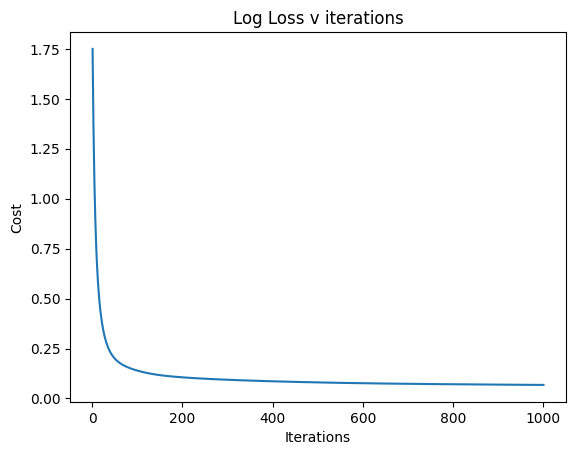

Final Weights:  [[ 1.06458838]
 [ 0.16572596]
 [-1.13044138]
 [-2.00333476]
 [ 0.07296201]
 [-1.49306149]
 [ 0.42426598]
 [-0.98415404]
 [-1.05865368]
 [-0.6540986 ]
 [ 0.81315966]
 [-0.71755242]
 [ 0.11554001]
 [ 0.10930527]
 [-0.72357655]
 [ 0.04527441]
 [ 0.42600878]
 [-1.08394336]
 [ 0.08313717]
 [ 0.418069  ]
 [ 1.75335584]
 [-0.95779222]
 [-1.05676394]
 [-2.29518277]
 [-0.41498987]
 [-0.54323816]
 [-0.4207158 ]
 [-0.26869687]
 [-0.2287334 ]
 [-0.34523784]
 [-0.29444247]]


In [56]:
theta = np.random.randn(n, 1)
theta = gradient_descent(X, y, theta, 0.085, 1000)

In [70]:
y_hat = h(X, theta)
print(y_hat.shape)
prediction = np.array(predict(y_hat), dtype = 'float')

(569, 1)


In [71]:
def predict(y_hat):
    
    p = []
    for i in range(y_hat.shape[0]):

        if y_hat[i] > 0.7:
            p.append(1)
        else:
            p.append(0)
            
    return p

In [82]:
from sklearn.metrics import plot_confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, classification_report

# print(f'Accuracy Score: {accuracy_score(y, prediction)}')
# print(f'F1 Score: {f1_score(y, prediction)}')
# print(f'Recall Score: {recall_score(y, prediction)}')
# print(f'Precision Score: {precision_score(y, prediction)}')
print(classification_report(y, prediction))
print(f'Confusion Matrix {confusion_matrix(y, prediction, labels = [0,1])}')

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       212
         1.0       0.99      0.96      0.97       357

    accuracy                           0.97       569
   macro avg       0.96      0.97      0.97       569
weighted avg       0.97      0.97      0.97       569

Confusion Matrix [[208   4]
 [ 14 343]]


In [89]:
import random
for i in range(5):
    
    s = random.randint(0,m)
    k = lambda x: 'Benign' if x == 0 else 'Malignant'
    
    print(f'Actual Class: {k(y[s])}')
    print(f'Predicted Class: {k(prediction[s])}')
    print('\n')

Actual Class: Malignant
Predicted Class: Malignant


Actual Class: Malignant
Predicted Class: Malignant


Actual Class: Malignant
Predicted Class: Malignant


Actual Class: Benign
Predicted Class: Benign


Actual Class: Malignant
Predicted Class: Malignant


